# CSCI 5523 Final Project

By: Peter Genatempo, Will Teachout, Will Chan, Jack Johnson, & Lukas Buhler

## OVERVIEW

We want to be able to predict whether or not someone will get a positive response back from a landlord on an application based on their race and sex.  From this we can see the impact that residential laws had on reducing descrimination on applicants.

This is an important issue because housing discrimination affects many people, so many in fact that a law had to be passed to prevent it. This will illustrate both the degree of this discrimination and whether the passing of a law against it had an effect on it.

We hope to see the impact of the different variables on whether someone will get a positive or negative response. We are expecting Race and Gender to be very impactful on the response.

## DATA

Positive or negative (binary) responses to housing applications in MSP. With predictors consisting of the statistics of the rental unit as well as race and sex information on the applicant.

Credit: This dataset comes from research done by Dr. Deborah Rho (University of St. Thomas) and Marina Mileo Gorzig (Saint Catherine University).

In [2]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset
data = pd.read_csv('StatData.csv')

## EXPLORATORY DATA ANALYSIS

In [4]:
# check head
data.head()

,batch,Appnumber,Type,MonthlyRent,Size,RacialGroup,Sex,contact,Minneapolis,Law,Positive,StayAtHome
0,5,1,2,1000,One bedroom units,White American,Female,Positive contact,Minneapolis,0,1,0
1,5,2,2,1000,One bedroom units,White American,Male,Positive contact,Minneapolis,0,1,0
2,5,3,2,1000,One bedroom units,Somali American,Female,Positive contact,Minneapolis,0,1,0
3,6,1,2,1410,One bedroom units,White American,Male,Ghosted,St. Paul and suburbs,0,0,0
4,6,2,2,1410,One bedroom units,African American,Female,Positive contact,St. Paul and suburbs,0,1,0


In [5]:
# check shape of data
np.shape(data)

(5583, 12)

In [6]:
# description of numerical data
data.describe()

,batch,Appnumber,Type,MonthlyRent,Law,Positive,StayAtHome
count,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000
mean,854.912771,1.595916,2.611141,1527.976715,0.494895,0.357335,0.115708
std,683.738709,0.726524,1.107189,598.067114,0.500019,0.479258,0.319904
min,5.000000,1.000000,1.000000,475.000000,0.000000,0.000000,0.000000
25%,253.000000,1.000000,2.000000,1112.500000,0.000000,0.000000,0.000000
50%,613.000000,1.000000,2.000000,1400.000000,0.000000,0.000000,0.000000
75%,1505.500000,2.000000,4.000000,1795.000000,1.000000,1.000000,0.000000
max,2211.000000,3.000000,4.000000,6000.000000,1.000000,1.000000,1.000000


In [7]:
# ***we need to decide what to do with these null values***

# check for null values
data.isnull().values.any()

True

In [31]:
data['Size'].unique()

array(['One bedroom units', 'Two or more bedrooms'], dtype=object)

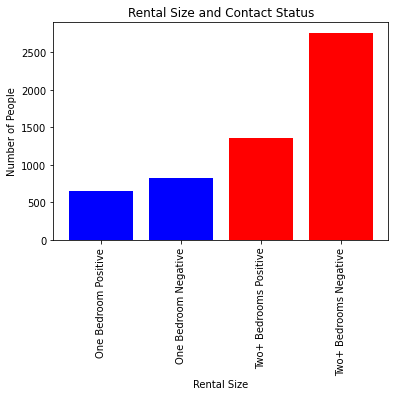

In [32]:
one_positive = data[(data['Size'] == 'One bedroom units') & (data['Positive'] == 1)].count()
one_negative = data[(data['Size'] == 'One bedroom units') & (data['Positive'] == 0)].count()
more_positive = data[(data['Size'] == 'Two or more bedrooms') & (data['Positive'] == 1)].count()
more_negative = data[(data['Size'] == 'Two or more bedrooms') & (data['Positive'] == 0)].count()


plt.bar('One Bedroom Positive', one_positive, color = 'b', label='One')
plt.bar('One Bedroom Negative', one_negative, color = 'b', label='One')
plt.bar('Two+ Bedrooms Positive', more_positive, color = 'r', label='More')
plt.bar('Two+ Bedrooms Negative', more_negative, color = 'r', label='More')

plt.title('Rental Size and Contact Status')
plt.xlabel('Rental Size')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.show()

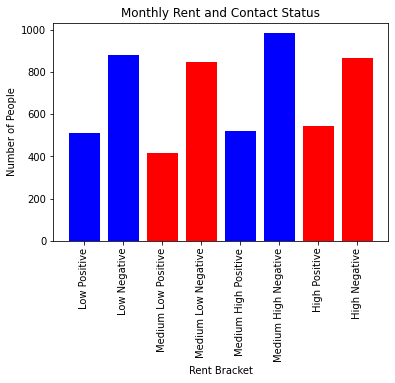

In [30]:
low_positive = data[(data['MonthlyRent'] < 1112.5) & (data['Positive'] == 1)].count()
low_negative = data[(data['MonthlyRent'] < 1112.5) & (data['Positive'] == 0)].count()
medlow_positive = data[(data['MonthlyRent'] < 1400) & (data['MonthlyRent'] >= 1112.5) & (data['Positive'] == 1)].count()
medlow_negative = data[(data['MonthlyRent'] < 1400) & (data['MonthlyRent'] >= 1112.5) & (data['Positive'] == 0)].count()
medhigh_positive = data[(data['MonthlyRent'] < 1795) & (data['MonthlyRent'] >= 1400) & (data['Positive'] == 1)].count()
medhigh_negative = data[(data['MonthlyRent'] < 1795) & (data['MonthlyRent'] >= 1400) & (data['Positive'] == 0)].count()
high_positive = data[(data['MonthlyRent'] >= 1795) & (data['Positive'] == 1)].count()
high_negative = data[(data['MonthlyRent'] >= 1795) & (data['Positive'] == 0)].count()

plt.bar('Low Positive', low_positive, color = 'b', label='Low')
plt.bar('Low Negative', low_negative, color = 'b', label='Low')
plt.bar('Medium Low Positive', medlow_positive, color = 'r', label='MedLow')
plt.bar('Medium Low Negative', medlow_negative, color = 'r', label='MedLow')
plt.bar('Medium High Positive', medhigh_positive, color = 'b', label='MedHigh')
plt.bar('Medium High Negative', medhigh_negative, color = 'b', label='MedHigh')
plt.bar('High Positive', high_positive, color = 'r', label='High')
plt.bar('High Negative', high_negative, color = 'r', label='High')
plt.title('Monthly Rent and Contact Status')
plt.xlabel('Rent Bracket')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.show()

In [8]:
data['contact'].unique()

array(['Positive contact', 'Ghosted', 'Ambiguous contact',
       'Negative contact'], dtype=object)

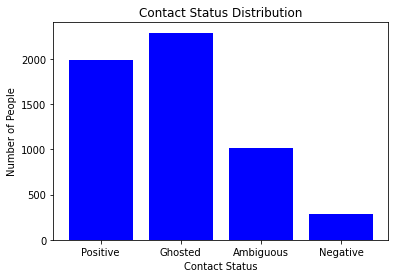

In [13]:
positive_contact = sum(data['contact'] == 'Positive contact')
ghosted_contact = sum(data['contact'] == 'Ghosted')
ambiguous_contact = sum(data['contact'] == 'Ambiguous contact')
negative_contact = sum(data['contact'] == 'Negative contact')

plt.bar('Positive', positive_contact, color = 'b', label='Positive')
plt.bar('Ghosted', ghosted_contact, color = 'b', label='Ghosted')
plt.bar('Ambiguous', ambiguous_contact, color = 'b', label='Ambiguous')
plt.bar('Negative', negative_contact, color = 'b', label='Negative')
plt.title('Contact Status Distribution')
plt.xlabel('Contact Status')
plt.ylabel('Number of People')
plt.show()

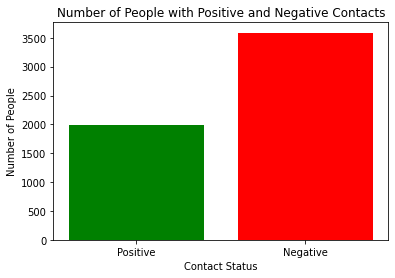

In [9]:
positive_contact = sum(data['Positive'] == 1)
negative_contact = sum(data['Positive'] == 0)

plt.bar('Positive', positive_contact, color = 'g', label='Positive')
plt.bar('Negative', negative_contact, color = 'r', label='Negative')
plt.title('Number of People with Positive and Negative Contacts')
plt.xlabel('Contact Status')
plt.ylabel('Number of People')
plt.show()

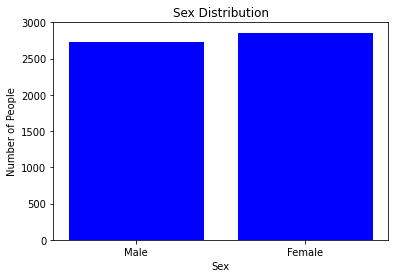

In [10]:
male_applicant = sum(data['Sex'] == 'Male')
female_applicant = sum(data['Sex'] == 'Female')

plt.bar('Male', male_applicant, color = 'b', label='Male')
plt.bar('Female', female_applicant, color = 'b', label='Female')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Number of People')
plt.show()

In [11]:
# view racial group categories
data['RacialGroup'].unique()

array(['White American', 'Somali American', 'African American'],
      dtype=object)

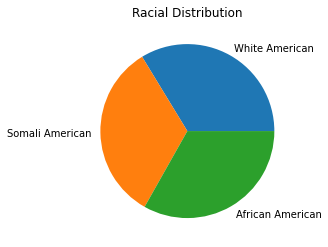

In [12]:
WA = sum(data['RacialGroup'] == 'White American')
SA = sum(data['RacialGroup'] == 'Somali American')
AA = sum(data['RacialGroup'] == 'African American')

y = [WA, SA, AA]
groups = ['White American', 'Somali American', 'African American']

plt.pie(y, labels=groups)
plt.title('Racial Distribution')
plt.show()

In [33]:
data['Minneapolis'].unique()

array(['Minneapolis', 'St. Paul and suburbs', nan], dtype=object)

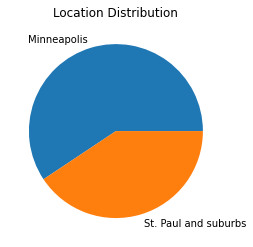

In [36]:
# nan has 0 occurances (not sure why this shows up in options above)
MN = sum(data['Minneapolis'] == 'Minneapolis')
SPS = sum(data['Minneapolis'] == 'St. Paul and suburbs')

y = [MN, SPS]
groups = ['Minneapolis', 'St. Paul and suburbs']

plt.pie(y, labels=groups)
plt.title('Location Distribution')
plt.show()

## MODELS